In [1]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
X = np.load("F:\\Dataset\\chess\\X.npy")
Y = np.load("F:\\Dataset\\chess\\Y.npy")

print(len(X), len(X[0]))

1039515 768


In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(3, activation="sigmoid", input_shape=(len(X[0]),)))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 2307      
                                                                 
Total params: 2,307
Trainable params: 2,307
Non-trainable params: 0
_________________________________________________________________


In [8]:
split = int(len(X)*0.75)
X_, Y_ = shuffle(X[0:split], Y[0:split], random_state=0)

hist = model.fit(X_, Y_, batch_size=128, epochs=10, validation_data=(X[split:len(X)], Y[split:len(Y)]),)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6068/6091 [============================>.] - ETA: 0s - loss: 0.7421 - accuracy: 0.5401WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000027C9367ED38> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

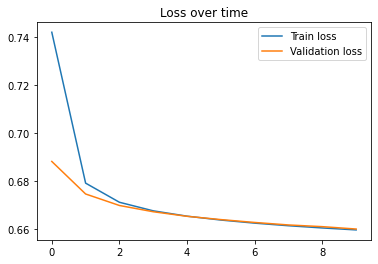

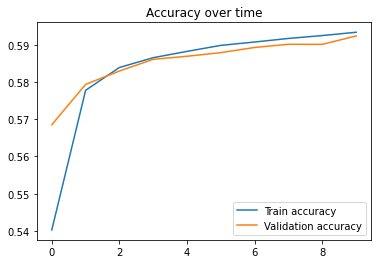

In [9]:
plt.title("Loss over time")
plt.plot(hist.history["loss"], label="Train loss")
plt.plot(hist.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

plt.title("Accuracy over time")
plt.plot(hist.history["accuracy"], label="Train accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.show()

In [10]:
model.save("./reg-log.h5")